In [14]:
import reg_analysis as ra
import pandas as pd
import xgb_param as xp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## XGB Analysis

In [15]:
train = pd.read_csv('../data/train_new.csv')
test = pd.read_csv('../data/test_new.csv')

In [16]:
# for i in range(len(train)):
#     train.loc[i,'team']= [train.loc[i,'home'], train.loc[i,'away']].sort()

# for i in range(len(test)):
#     test.loc[i,'team']= [test.loc[i,'home'], test.loc[i,'away']].sort()

In [17]:
train.drop(1567,axis=0,inplace=True)
# train.drop([635,1059,1212,1497,1525,1919,1567],axis=0,inplace=True)

In [18]:
y = train['y']
x = train.drop(['id','y'],axis=1)

In [19]:
train.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','referee', 'stadium','away_stadium','home_stadium','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','lat','lng','home_score','away_score','地方局','day','year'],axis=1 ,inplace=True)

test.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','referee','stadium','away_stadium','home_stadium', 'home_01', 'home_02',  'home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','lat','lng','home_score','away_score','地方局','day','year'],axis=1 ,inplace=True)

In [20]:
train['absorp'].value_counts()

29.216456    79
42.703167    60
24.700000    55
32.617222    54
36.445370    54
16.011852    54
24.667407    54
51.471481    54
52.349630    54
32.017778    54
41.795660    53
29.207500    52
22.866275    51
53.970000    50
24.859600    50
37.259800    50
24.819400    50
27.456600    50
20.175000    48
64.047391    46
45.038409    44
63.448182    44
67.742045    44
32.989070    43
57.114884    42
63.731667    42
59.467381    42
38.830476    42
22.546429    42
77.735854    41
69.509250    40
69.532250    40
73.938974    39
52.031795    39
38.249412    34
27.138437    32
34.060333    30
51.561600    25
68.444167    24
36.851429    21
34.799000    20
54.454737    19
39.585000    18
62.538333    18
15.050000    11
30.240000     6
28.345000     6
45.432000     5
48.267500     4
70.492500     4
39.930000     4
26.816667     3
30.490000     3
49.876667     3
24.620000     1
34.970000     1
39.460000     1
24.630000     1
78.350000     1
Name: absorp, dtype: int64

In [21]:
y = train['y']
x = train.drop(['id','y'],axis=1)

In [22]:
model = ra.xgb_analysis(x,y)

In [23]:
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0,'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
model2 = ra.xgb_analysis(x,y,params)
ra.Compare_data(model2,test)

2795.6513839678037

In [24]:
# ra.Export_csv(model2,test,'sub_adjust4')

In [25]:
a
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25,'colsample_bylevel': 0.8, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
for i in range(1,11):
   params['max_depth'] = i

   rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

NameError: name 'a' is not defined

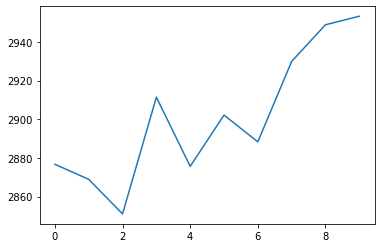

In [477]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.35, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
for i in range(1,11):
    params['min_child_weight'] = i

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

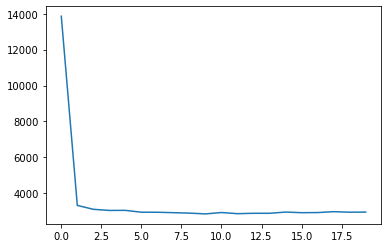

In [478]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
for i in range(1,101,5):
    params['subsample'] = (i-1)/100

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

In [641]:
rmse

[3453.5068317331306,
 3453.5068317331306,
 2854.5780466655615,
 2810.504505217584,
 2880.9566851639815,
 2796.0406508302535,
 2820.171145761287,
 2927.730288500621,
 2902.782496038688,
 2954.567621859958,
 2877.439296902552,
 2915.8712671453254,
 2893.4846291039535,
 2877.5811745384717,
 2888.690559827746,
 2907.73183222292,
 2939.5538034284787,
 2972.6422585618143,
 2971.376392114439,
 2994.876632669371]

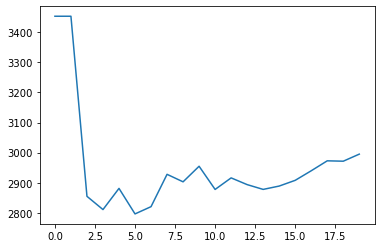

In [640]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
for i in range(1,101,5):
    params['colsample_bytree'] = (i-1)/100

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

In [481]:
rmse = []
params =  {'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.0, 'subsample': 0.65, 'colsample_bytree': 0.25, 'objective': 'reg:squarederror', 'nthread': 4, 'scale_pos_weight': 1, 'seed': 17, 'reg_alpha': 140}
for i in range(1,101,1):
    params['learning_rate'] = (i-1)/100

    rmse.append(ra.Compare_data(ra.xgb_analysis(x,y,params),test))
plt.plot(rmse) 

KeyboardInterrupt: 

In [325]:
# import datetime

# with open('./test_memory.txt','a')as f:
#     f.write("test : "+str(datetime.datetime.now()) + "\n")
#     f.write("columns : " + str(x.columns) + "\n")
#     f.write("params : " + str(params) + "\n")
#     f.write("rmse : "+str(ra.Compare_data(model2,test)) + "\n\n")
# f.close()

In [326]:
# ra.Compare_data(model2,test)

In [327]:
# ra.Export_csv(model2,test,'sub_adjust2')

In [328]:
# xp.param_optimize(train,test)

In [329]:
# for col in x.columns:
#     print(f"column : {col} ")
#     ra.Compare_data(ra.xgb_analysis(x.drop([col],axis=1),y),test.drop([col],axis=1))
#     print("\n")

In [330]:
result = pd.read_csv('../data/result.csv')

In [331]:
result = pd.merge(left= result,right=test,on='id')
result.shape

(351, 35)

In [332]:
# result.corr()

In [333]:
# plt.figure(figsize=(36, 18)) 
# sns.heatmap(result.drop(['id'],axis=1).corr(), vmax=1, vmin=-1, center=0, cmap="coolwarm", annot=True, )
# plt.show()

In [334]:
# result = pd.read_csv('../data/result.csv')
# test = pd.read_csv('../data/test_new.csv')

In [335]:
# result = pd.merge(left= result,right=test,on='id')

In [336]:
# plt.figure(figsize=(36, 18)) 
# sns.heatmap(result.drop(['id'],axis=1).corr(), vmax=1, vmin=-1, center=0, cmap="coolwarm", annot=True, )
# plt.show()

## cat analysis

In [337]:
train = pd.read_csv('../data/train_new.csv')
test = pd.read_csv('../data/test_new.csv')

In [338]:
y = train['y']
x = train.drop(['id','y'],axis=1)

In [339]:
modelc = ra.cat_analysis(x,y)
ra.Compare_data(modelc , test)

5ms
797:	learn: 761.3472926	test: 2601.1371811	best: 2599.6957331 (763)	total: 3.52s	remaining: 891ms
798:	learn: 760.1659684	test: 2601.4169587	best: 2599.6957331 (763)	total: 3.52s	remaining: 886ms
799:	learn: 759.2150211	test: 2601.5046342	best: 2599.6957331 (763)	total: 3.53s	remaining: 882ms
800:	learn: 757.9777319	test: 2602.2815928	best: 2599.6957331 (763)	total: 3.53s	remaining: 877ms
801:	learn: 757.0783503	test: 2602.4349554	best: 2599.6957331 (763)	total: 3.54s	remaining: 873ms
802:	learn: 756.5230541	test: 2602.4638875	best: 2599.6957331 (763)	total: 3.54s	remaining: 868ms
803:	learn: 755.0757418	test: 2602.5779014	best: 2599.6957331 (763)	total: 3.54s	remaining: 864ms
804:	learn: 754.1686983	test: 2602.6560203	best: 2599.6957331 (763)	total: 3.55s	remaining: 859ms
805:	learn: 752.8984694	test: 2602.8598127	best: 2599.6957331 (763)	total: 3.55s	remaining: 855ms
806:	learn: 751.7677335	test: 2602.4637550	best: 2599.6957331 (763)	total: 3.56s	remaining: 851ms
807:	learn: 750.

2971.437943742028

In [340]:
# x.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','地方局','ｽｶﾊﾟｰ','BS-TBS','year','day','home_score','away_score','away_stadium','home_stadium','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','child','age','month'],axis=1,inplace=True)

# test.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','地方局','ｽｶﾊﾟｰ','BS-TBS','year','day','home_score','away_score','away_stadium', 'home_stadium','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11','child','age','month'],axis=1,inplace=True)

In [341]:
# modelc = ra.cat_analysis(x,y)
# ra.Compare_data(modelc , test)

In [342]:
# ra.plot_feature_importance(modelc.feature_importances_,x.columns,'cat')

In [343]:
ra.Export_csv(modelc,test,'sub_cat')

In [344]:
# params = xp.cat_hyper(x,y,100)

In [345]:
# modelc = ra.cat_analysis(x,y,params)
# ra.Compare_data(modelc , test)